# Perform basic EDA

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [5]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.shape

(13200, 7)

In [7]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [8]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [9]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

# Create a box plot and use this to determine which method seems to work best to remove outliers for this data?


Let's create box plots to visualize outliers for the numerical columns: total_sqft, bath, price, and price_per_sqft. This will help determine which method works best for outlier removal.

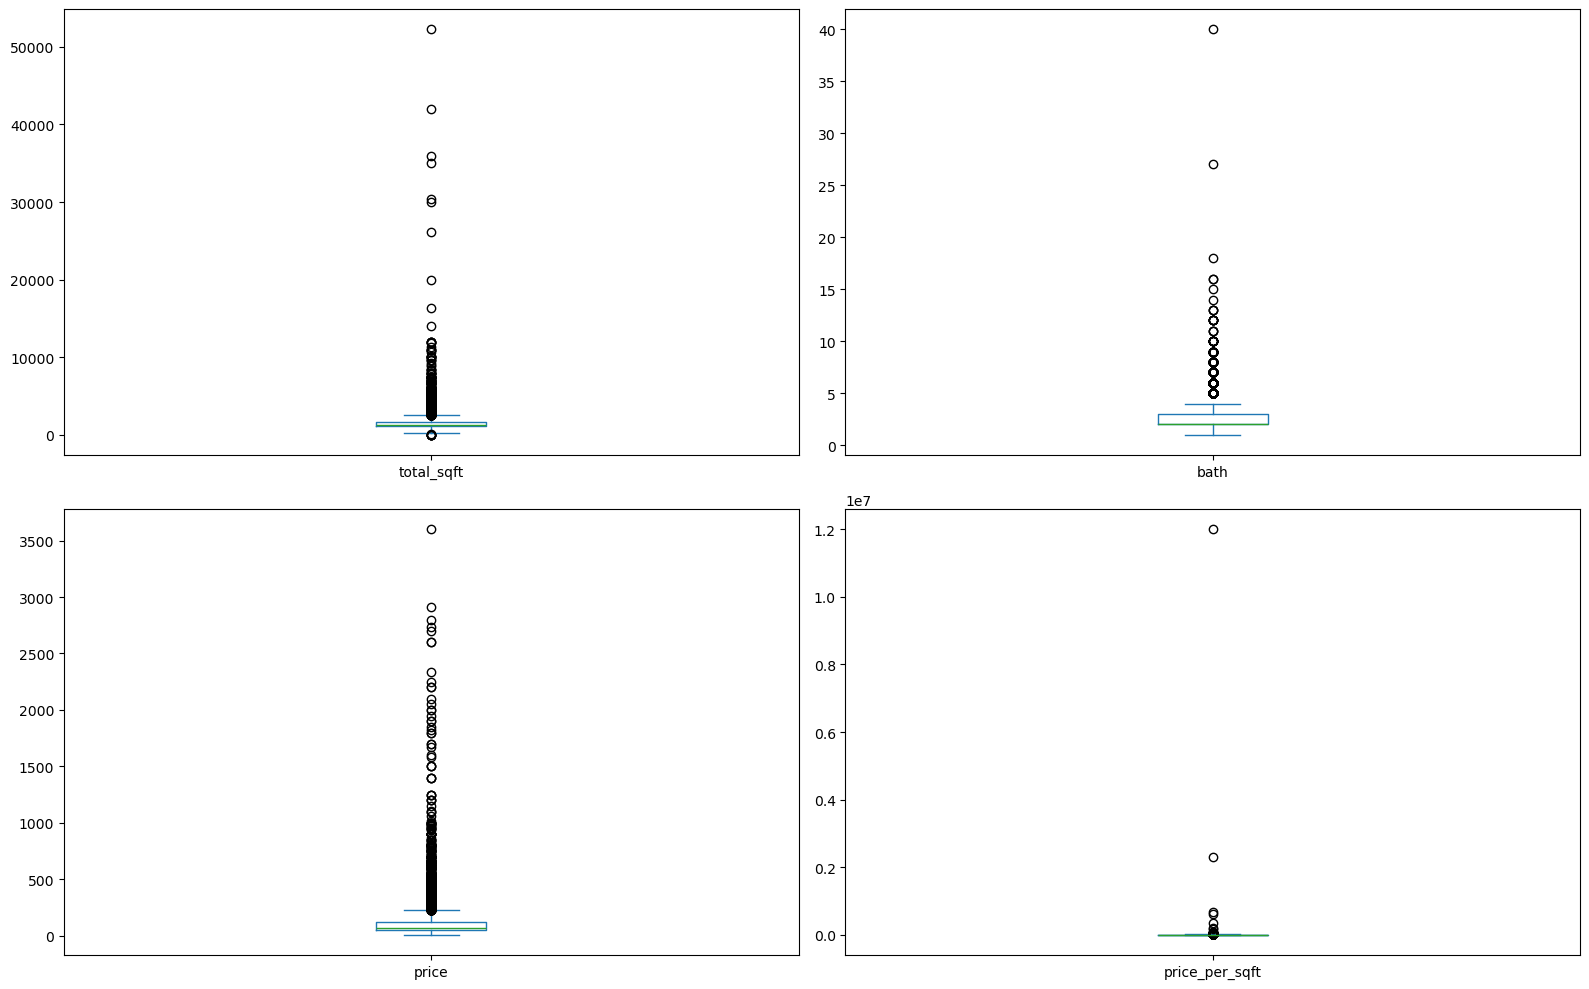

In [12]:
numerical_cols = ['total_sqft', 'bath', 'price', 'price_per_sqft']
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(16, 10))
plt.tight_layout()
plt.show()

# Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)
* Mean and Standard deviation
* Percentile method
* IQR(Inter quartile range method)
* Z Score method


* Z Score method

In [15]:
# Z-score method for the column price
df['Z_score'] = (df['price'] - df['price'].mean()) / df['price'].std()
threshold = 3   # Define threshold (typically 3 or -3)
outliers = df[(df['Z_score'] > threshold) | (df['Z_score'] < -threshold)]  # Find outliers
print("Outliers:")
print(outliers)

Outliers:
                 location       size  total_sqft  bath   price  bhk  \
7            Rajaji Nagar      4 BHK     3300.00   4.0   600.0    4   
61             Whitefield  4 Bedroom     5700.00   5.0   650.0    4   
157    Mahalakshmi Layout  4 Bedroom     3750.00   4.0   760.0    4   
404          Rajaji Nagar      7 BHK    12000.00   6.0  2200.0    7   
435            Whitefield  4 Bedroom    11890.00   4.0   700.0    4   
...                   ...        ...         ...   ...     ...  ...   
12967               other      5 BHK     5665.84   7.0   988.0    5   
12976               other      4 BHK     6652.00   6.0   660.0    4   
13000               other  4 Bedroom     6688.00   6.0   700.0    4   
13078               other  4 Bedroom     9200.00   4.0  2600.0    4   
13081               other  6 Bedroom     8000.00   6.0  2800.0    6   

       price_per_sqft    Z_score  
7               18181   3.269452  
61              11403   3.604627  
157             20266   4.342011

<Axes: ylabel='price'>

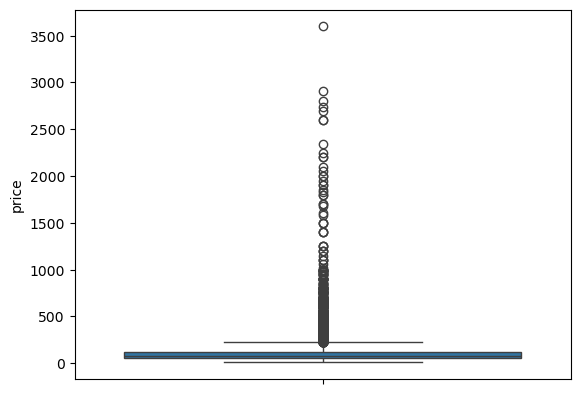

In [16]:
sns.boxplot(df['price'])

In [17]:
df_cleaned = df[(df['Z_score'] <= threshold) & (df['Z_score'] >= -threshold)]
df_cleaned = df_cleaned.drop(columns=['Z_score'])
print("Data after removing outliers:")
print(df_cleaned)

Data after removing outliers:
                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699

<Axes: ylabel='price'>

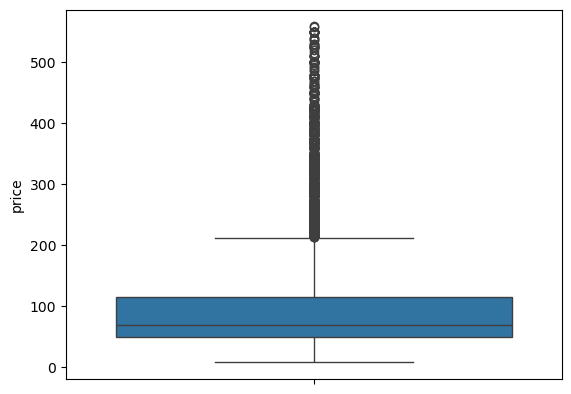

In [18]:
sns.boxplot(df_cleaned['price'])

* Mean and Standard deviation method

In [20]:
#Mean and Standard deviation for the column total_sqft
#Find the limits
ul=df['total_sqft'].mean() + 3*df['total_sqft'].std()
ll=df['total_sqft'].mean() - 3*df['total_sqft'].std()
print(ul)
print(ll)

5267.273119159083
-2156.6675532499917


In [21]:
#Find outliers for the column total_sqft
df.loc[(df['total_sqft']>ul)|(df['total_sqft']<ll)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
61,Whitefield,4 Bedroom,5700.0,5.0,650.0,4,11403,3.604627
120,Hebbal,4 BHK,5611.5,4.0,477.0,4,8500,2.444923
404,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7,18333,13.995039
435,Whitefield,4 Bedroom,11890.0,4.0,700.0,4,5887,3.939802
509,Banashankari Stage III,4 Bedroom,8500.0,4.0,145.0,4,1705,0.219364
...,...,...,...,...,...,...,...,...
12976,other,4 BHK,6652.0,6.0,660.0,4,9921,3.671662
13000,other,4 Bedroom,6688.0,6.0,700.0,4,10466,3.939802
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260,16.676435
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,18.017134


In [22]:
#Delete the outlier data using Trimming 
new_df=df.loc[(df['total_sqft']<=ul)&(df['total_sqft']>=ll)]
print("Length of old data:",len(df))
print("Length of new data:",len(new_df))
print("Outliers:",len(df)-len(new_df))

Length of old data: 13200
Length of new data: 13083
Outliers: 117


<Axes: ylabel='total_sqft'>

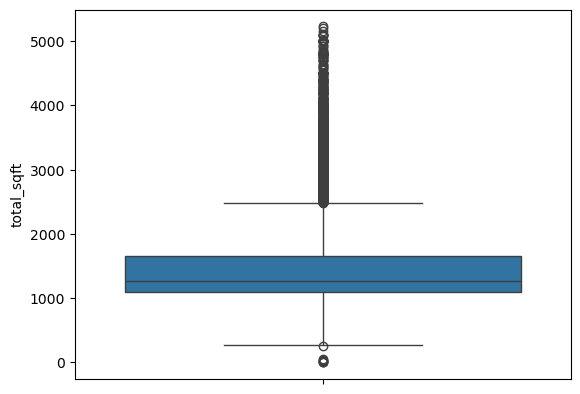

In [23]:
sns.boxplot(new_df['total_sqft'])

In [24]:
#Changing the oulier values to upper or lower limit values : Capping
new_df=df.copy()
new_df.loc[new_df['total_sqft']>ul,'total_sqft']=ul
new_df.loc[new_df['total_sqft']<ll,'total_sqft']=ll

<Axes: ylabel='total_sqft'>

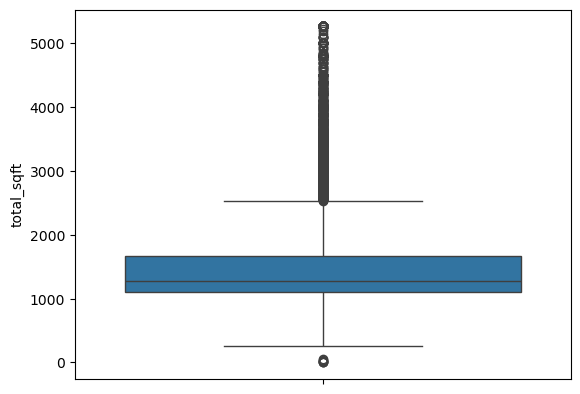

In [25]:
sns.boxplot(new_df['total_sqft'])

* IQR(Inter quartile range method)

In [27]:
# IQR(Inter quartile range method) for the column price_per_sqft
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:",Q1)
print("Q3:",Q3)
print("IQR:",IQR)

Q1: 4267.0
Q3: 7317.0
IQR: 3050.0


In [28]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print("Lower limit:",lower_limit)
print("Upper limit:",upper_limit)

Lower limit: -308.0
Upper limit: 11892.0


<Axes: ylabel='price_per_sqft'>

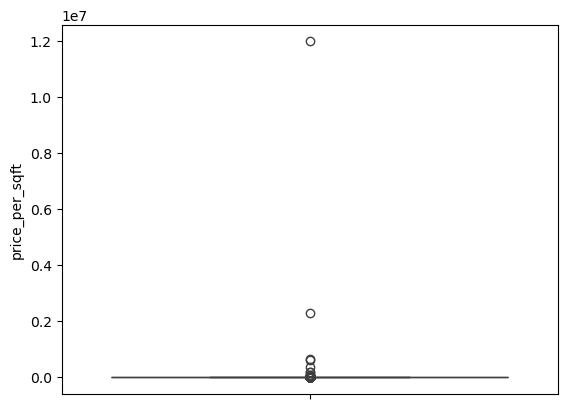

In [29]:
sns.boxplot(df['price_per_sqft'])

In [30]:
#Find outliers for the column price_per_sqft
df.loc[(df['price_per_sqft']>ul)|(df['price_per_sqft']<ll)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.0,3,6245,-0.115811
6,Old Airport Road,4 BHK,2732.0,4.0,204.0,4,7467,0.614870
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181,3.269452
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,1.727649
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592,1.224888
...,...,...,...,...,...,...,...,...
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666,0.923230
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.0,3,6530,-0.001851
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689,0.795864
13196,other,4 BHK,3600.0,5.0,400.0,4,11111,1.928754


In [31]:
#Delete the outlier data using Trimming 
new_df=df.loc[(df['price_per_sqft']<=ul)&(df['price_per_sqft']>=ll)]
print("Length of old data:",len(df))
print("Length of new data:",len(new_df))
print("Outliers:",len(df)-len(new_df))

Length of old data: 13200
Length of new data: 6195
Outliers: 7005


<Axes: ylabel='price_per_sqft'>

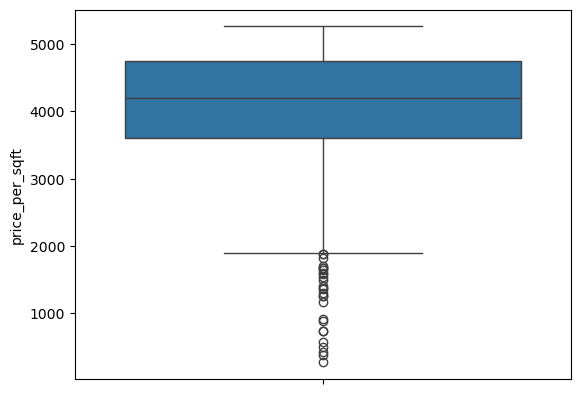

In [32]:
sns.boxplot(new_df['price_per_sqft'])

In [33]:
# Changing the oulier values to upper or lower limit values : Capping
new_df=df.copy()
new_df.loc[new_df['price_per_sqft']>ul,'price_per_sqft']=ul
new_df.loc[new_df['price_per_sqft']<ll,'price_per_sqft']=ll

<Axes: ylabel='price_per_sqft'>

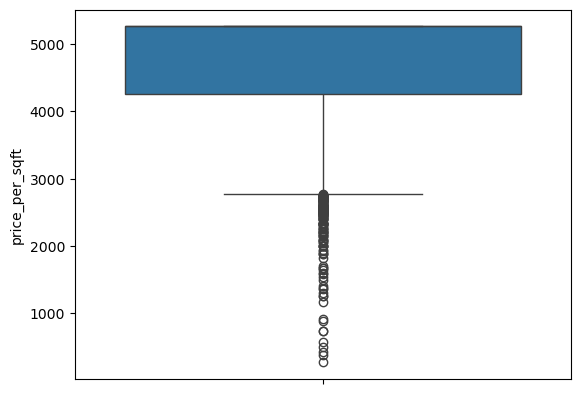

In [34]:
sns.boxplot(new_df['price_per_sqft'])

* Percentile method

In [36]:
# Percentile method for column bath
ul=df['bath'].quantile(0.99)
ll=df['bath'].quantile(0.01)
print("Upper limit:",ul)
print("Lower limit",ll)

Upper limit: 8.0
Lower limit 1.0


<Axes: ylabel='bath'>

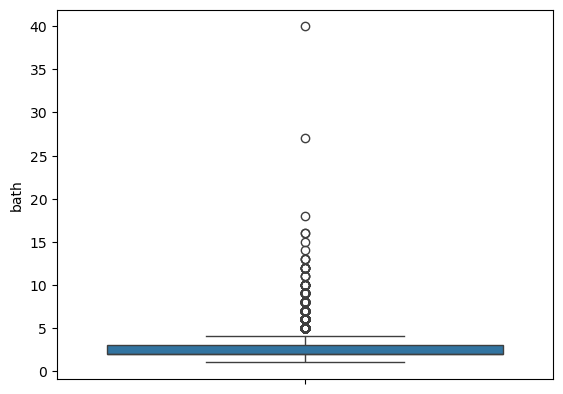

In [37]:
sns.boxplot(df['bath'])

In [38]:
#Find outliers for the column bath
df.loc[(df['bath']>ul)|(df['bath']<ll)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,0.588056
454,other,11 BHK,5000.0,9.0,360.0,11,7200,1.660615
533,Mico Layout,9 BHK,5000.0,9.0,210.0,9,4200,0.655091
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,0.521021
925,5th Phase JP Nagar,9 Bedroom,1260.0,11.0,290.0,9,23015,1.191370
...,...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349,23.379927
13022,other,9 BHK,4600.0,9.0,150.0,9,3260,0.252881
13100,Laggere,7 Bedroom,1590.0,9.0,132.0,7,8301,0.132218
13102,other,9 Bedroom,1178.0,9.0,75.0,9,6366,-0.249881


In [39]:
#Delete the outlier data using Trimming 
new_df=df.loc[(df['bath']<=ul)&(df['bath']>=ll)]
print("Length of old data:",len(df))
print("Length of new data:",len(new_df))
print("Outliers:",len(df)-len(new_df))

Length of old data: 13200
Length of new data: 13126
Outliers: 74


<Axes: ylabel='bath'>

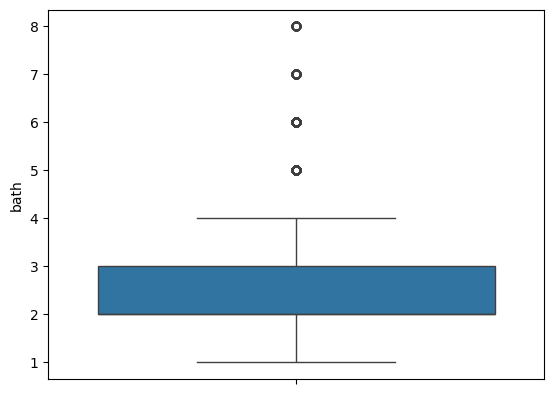

In [40]:
sns.boxplot(new_df['bath'])

In [41]:
# Changing the oulier values to upper or lower limit values : Capping
new_df=df.copy()
new_df.loc[new_df['bath']>ul,'bath']=ul
new_df.loc[new_df['bath']<ll,'bath']=ll

<Axes: ylabel='bath'>

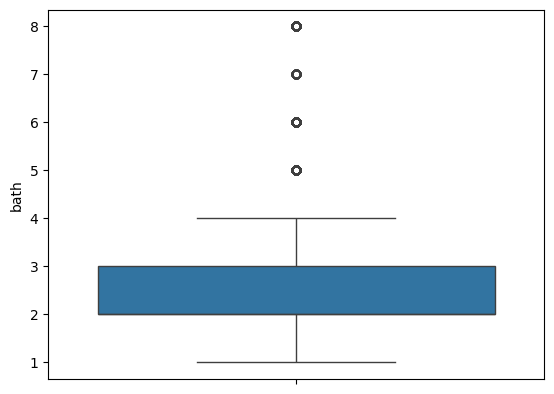

In [42]:
sns.boxplot(new_df['bath'])

# Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

Before Transformation:
Skew: 108.28105529705168
Kurtosis: 12095.21502832288


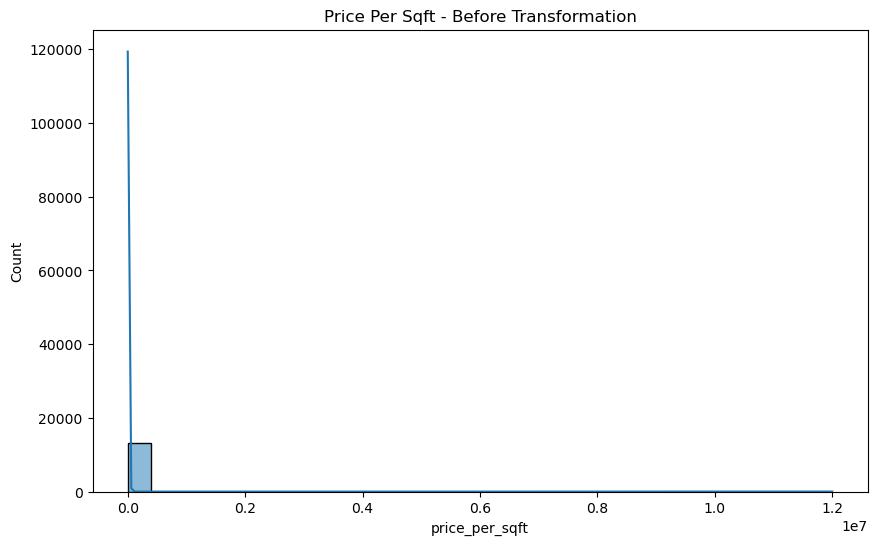

In [44]:
print("Before Transformation:")
print("Skew:",df["price_per_sqft"].skew())
print("Kurtosis:",df["price_per_sqft"].kurtosis())
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Price Per Sqft - Before Transformation')
plt.show()

In [45]:
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])


After Log Transformation:
Skew: 108.28105529705168
Kurtosis: 12095.21502832288


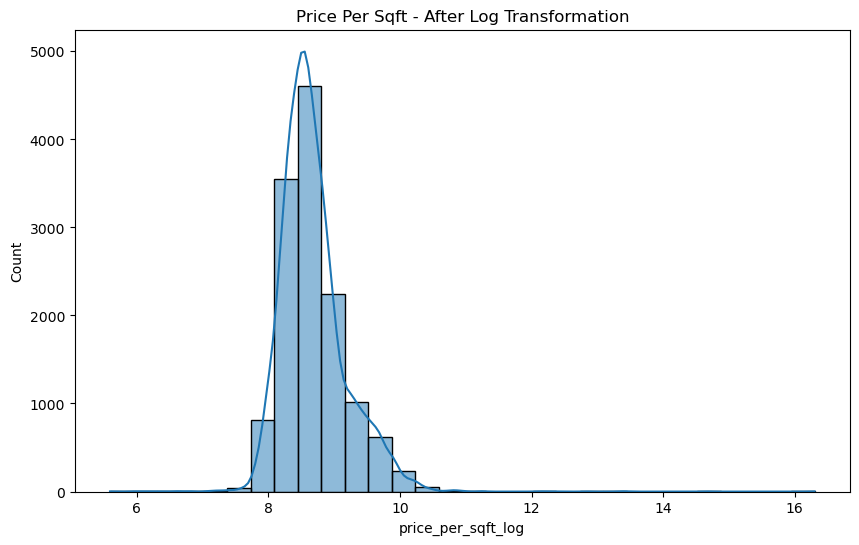

In [46]:
print("\nAfter Log Transformation:")
print("Skew:",df["price_per_sqft"].skew())
print("Kurtosis:",df["price_per_sqft"].kurtosis())
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_log'], bins=30, kde=True)
plt.title('Price Per Sqft - After Log Transformation')
plt.show()

# Check the correlation between all the numerical columns and plot heatmap.

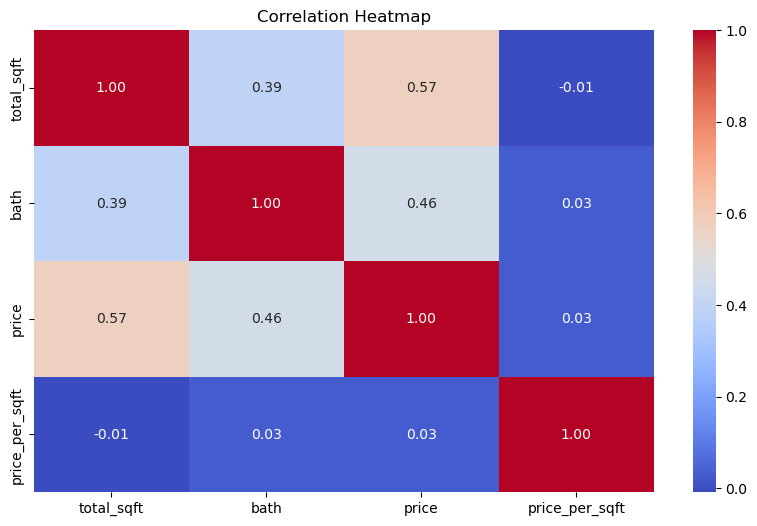

In [48]:
cols = ['total_sqft', 'bath', 'price', 'price_per_sqft']
correlation_matrix = df[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Draw Scatter plot between the variables to check the correlation between them.

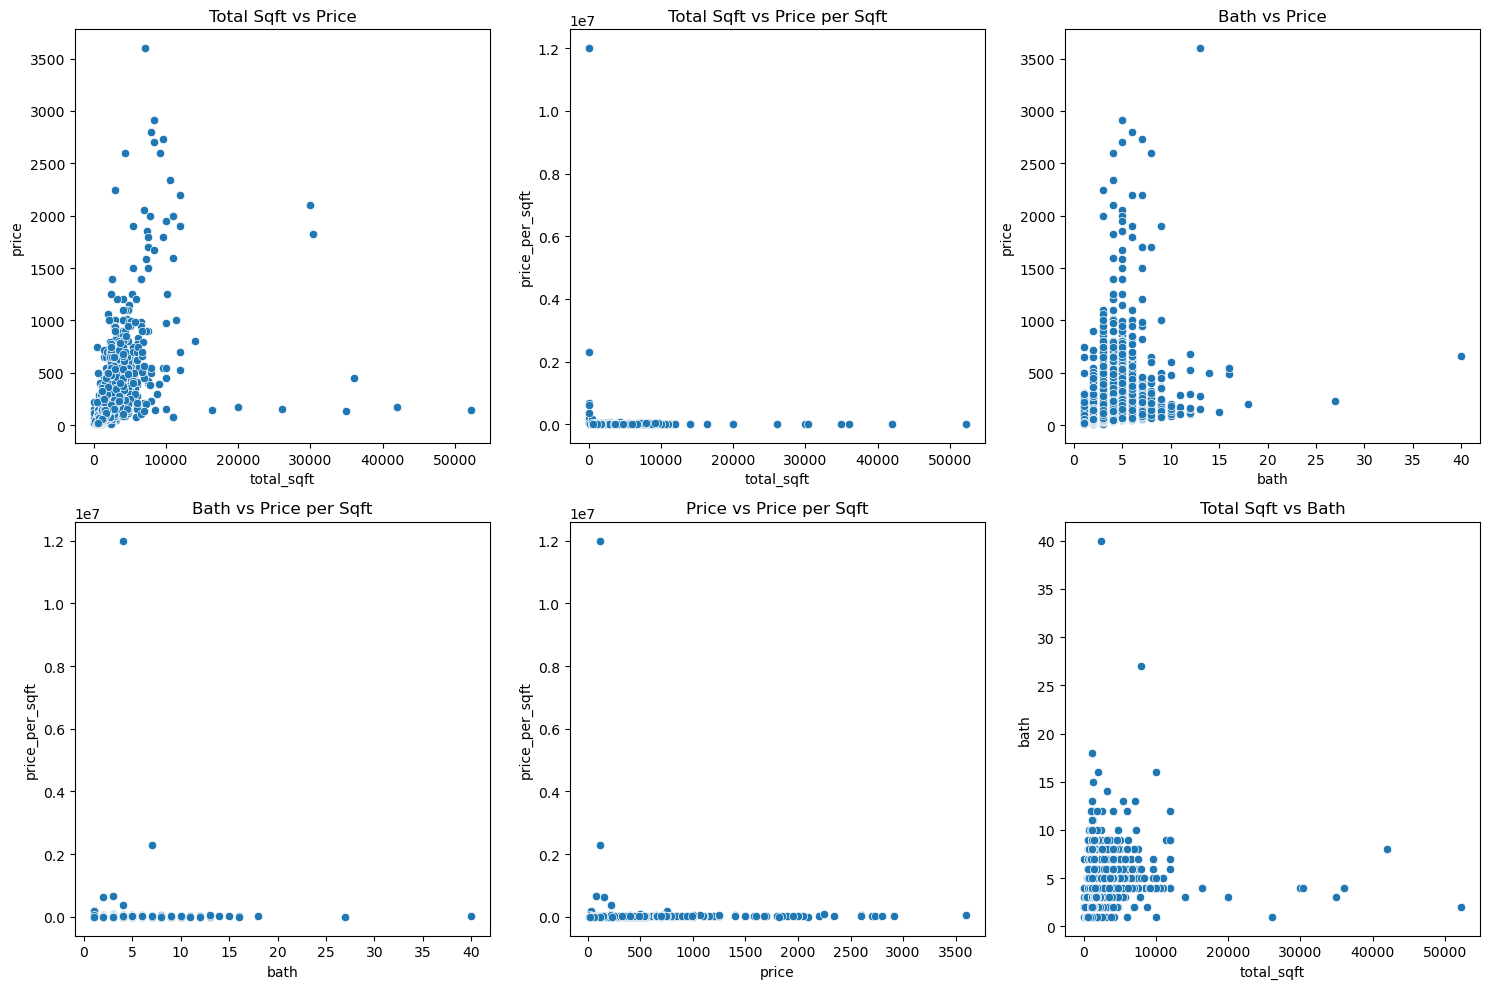

In [91]:
cols = ['total_sqft', 'bath', 'price', 'price_per_sqft']
plt.figure(figsize=(15, 10))

# total_sqft vs price
plt.subplot(2, 3, 1)
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Total Sqft vs Price')

# total_sqft vs price_per_sqft
plt.subplot(2, 3, 2)
sns.scatterplot(x='total_sqft', y='price_per_sqft', data=df)
plt.title('Total Sqft vs Price per Sqft')

# bath vs price
plt.subplot(2, 3, 3)
sns.scatterplot(x='bath', y='price', data=df)
plt.title('Bath vs Price')

# bath vs price_per_sqft
plt.subplot(2, 3, 4)
sns.scatterplot(x='bath', y='price_per_sqft', data=df)
plt.title('Bath vs Price per Sqft')

# price vs price_per_sqft
plt.subplot(2, 3, 5)
sns.scatterplot(x='price', y='price_per_sqft', data=df)
plt.title('Price vs Price per Sqft')

# total_sqft vs bath
plt.subplot(2, 3, 6)
sns.scatterplot(x='total_sqft', y='bath', data=df)
plt.title('Total Sqft vs Bath')

plt.tight_layout()
plt.show()